In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import My_functions_v2 as my

In [3]:
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_filter.pkl')
DNS = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/DNS.pkl')
Half_orbit = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/half_orbit_and_omni.pkl')

<IPython.core.display.Javascript object>


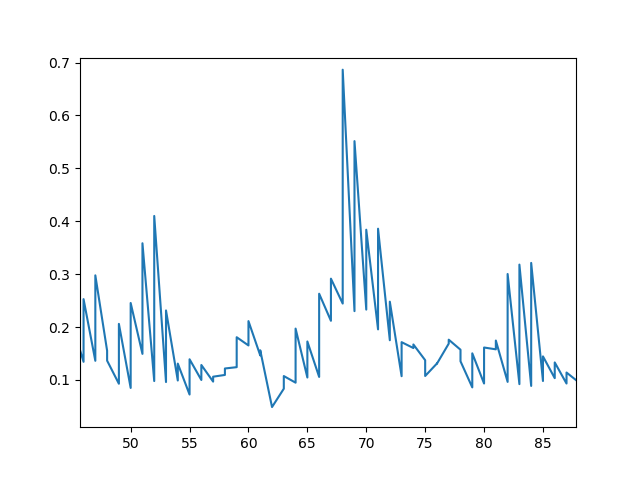

In [4]:
plt.figure()

plt.plot(Half_orbit.Orbit_nr,Half_orbit.FAC)

## DNS density plot

In [14]:
my.add_apex_coords(DNS,date = 'none', h = 450)
my.add_heading(DNS, latitude = 'Latitude' )
pOrbit_nr_DNS = np.cumsum(np.append(0, abs(np.diff(DNS.N_heading.values))))/4

mLatitude is all ready in the dataframe
N_heading is all ready in the dataframe


In [24]:
start_orbit=420

N = 70

fig_index1 = np.arange(-90,90,0.5)
fig_index2 = np.arange(90,-90.5,-0.5)
fig_index = np.hstack([fig_index1,fig_index2])

dates = np.zeros(fig_orbit)
fig_orbit = np.zeros(N)

fig_values = np.zeros([len(fig_index),len(fig_orbit)])

for i in range(N):
    data_column1= DNS[abs(pOrbit_nr_DNS-(start_orbit+i))<0.01]
    if data_column1.N_heading.mean() > 0:
        data_column2 = DNS[abs(pOrbit_nr_DNS-(start_orbit+i+0.5))<0.01]
    else:
        data_column1= DNS[abs(pOrbit_nr_DNS-(start_orbit+i+0.5))<0.01]
        data_column2 = DNS[abs(pOrbit_nr_DNS-(start_orbit+i+1))<0.01]

    data_column1 = data_column1.set_index('Latitude')
    data_column2 = data_column2.set_index('Latitude')

    data_column1 = data_column1.reindex(labels=fig_index1, method='nearest', tolerance=1).Density.values
    data_column2 = data_column2.reindex(labels=fig_index2, method='nearest', tolerance=1).Density.values

    fig_values[:,i] = np.hstack([data_column1,data_column2])

In [60]:
y_labels = np.array([-90,-45,0,45,90,45,0,-45,-90])
len()

9

<IPython.core.display.Javascript object>


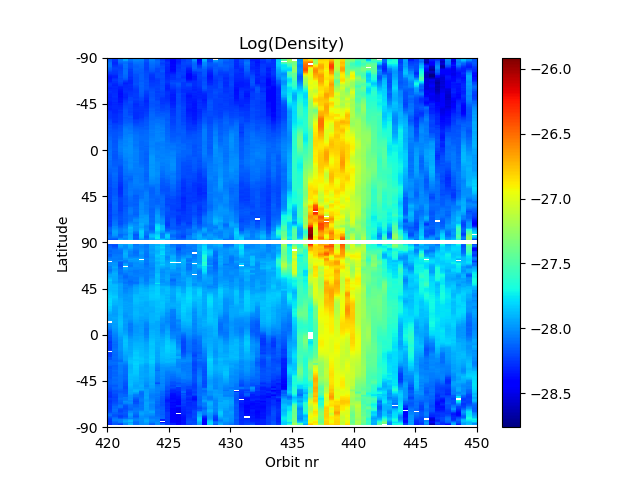

Text(0.5,1,'Log(Density)')

In [64]:
plt.figure()

plt.imshow(np.log(fig_values), extent=[0, 5, 0, 5], aspect='equal', origin='lower',
           cmap='jet')
plt.colorbar()
#plt.axis(aspect='image')

# Set the ticks and labels...

x_ticks = (fig_orbit[::10]-fig_orbit[0])/max(fig_orbit[::10]-fig_orbit[0])*5
x_labels = fig_orbit[::10].astype('int')
plt.xticks(x_ticks, x_labels)
plt.xlabel('Orbit nr')

y_ticks = np.linspace(0,5,9)
y_labels = [-90,-45,0,45,90,45,0,-45,-90]
plt.yticks(y_ticks, y_labels)
plt.ylabel('Latitude')


plt.title('Log(Density)')


In [52]:
fig_orbit[::10].astype('int')

array([420, 425, 430, 435, 440, 445, 450])

In [46]:
(fig_orbit[::10]-fig_orbit[0])/max(fig_orbit[::10]-fig_orbit[0])*5

array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
        4.16666667,  5.        ])

## FAC

In [8]:
FAC.loc[:,'FAC_roll']  = abs(FAC.FAC).rolling('30s').mean().values

In [9]:
my.add_apex_coords(FAC,date = 'none', h = 450)
my.add_heading(FAC, latitude = 'Latitude' )
pOrbit_nr = np.cumsum(np.append(0, abs(np.diff(FAC.N_heading.values))))/4


In [65]:
start_orbit=420
min_lat = 30
N = 70

fig_index1 = np.hstack([np.arange(-90,-min_lat,0.01),0, np.arange(min_lat,90,0.01)])
fig_index2 = np.hstack([np.arange(90,min_lat,-0.01),0, np.arange(-min_lat,-90,-0.01)])
fig_index = np.hstack([fig_index1,fig_index2])

fig_orbit = np.array(range(N))/2+start_orbit

f_fig_values = np.zeros([len(fig_index),len(fig_orbit)])

for i in range(N):
    data_column1= FAC[abs(pOrbit_nr-(start_orbit+i))<0.01]
    if data_column1.N_heading.mean() > 0:
        data_column2 = FAC[abs(pOrbit_nr-(start_orbit+i+0.5))<0.01]
    else:
        data_column1= FAC[abs(pOrbit_nr-(start_orbit+i+0.5))<0.01]
        data_column2 = FAC[abs(pOrbit_nr-(start_orbit+i+1))<0.01]

    data_column1 = data_column1.set_index('Latitude')
    data_column2 = data_column2.set_index('Latitude')

    data_column1 = data_column1.reindex(labels=fig_index1, method='nearest', tolerance=1).FAC_roll.values
    data_column2 = data_column2.reindex(labels=fig_index2, method='nearest', tolerance=1).FAC_roll.values

    f_fig_values[:,i] = np.hstack([data_column1,data_column2])

<IPython.core.display.Javascript object>


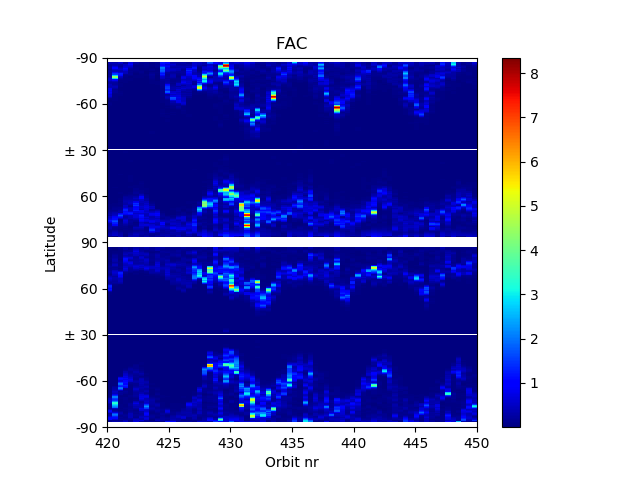

Text(0.5,1,'FAC')

In [66]:
plt.figure()

plt.imshow(abs(f_fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#cmap='seismic')
plt.colorbar()

# Set the ticks and labels...

x_ticks = (fig_orbit[::10]-fig_orbit[0])/max(fig_orbit[::10]-fig_orbit[0])*5
x_labels = fig_orbit[::10].astype('int')
plt.xticks(x_ticks, x_labels)
plt.xlabel('Orbit nr')

y_ticks = np.linspace(0,5,9)
y_labels = [-90,-60,'$\pm$ 30',60,90,60,'$\pm$ 30',-60,-90]
plt.yticks(y_ticks, y_labels)
plt.ylabel('Latitude')


plt.title('FAC')

<IPython.core.display.Javascript object>


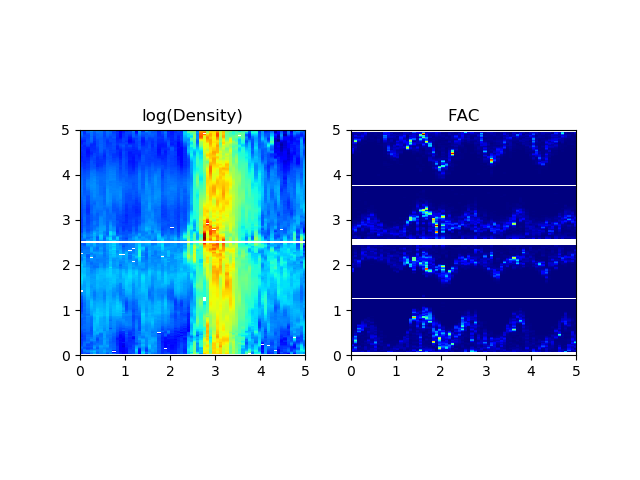

Text(0.5,1,'FAC')

In [12]:
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(np.log(fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('log(Density)')

plt.subplot(1, 2, 2)

plt.imshow(abs(f_fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('FAC')

In [19]:
start_orbit=50

N = 50

fig_index1 = np.arange(-90,90,0.5)
fig_index2 = np.arange(90,-90.5,-0.5)
fig_index = np.hstack([fig_index1,fig_index2])

fig_orbit = np.array(range(N))/2+start_orbit

fig_values = np.zeros([len(fig_index),len(fig_orbit)])

for i in range(N):
    data_column1= DNS[abs(pOrbit_nr_DNS-(start_orbit+i))<0.01]
    if data_column1.N_heading.mean() > 0:
        data_column2 = DNS[abs(pOrbit_nr_DNS-(start_orbit+i+0.5))<0.01]
    else:
        data_column1= DNS[abs(pOrbit_nr_DNS-(start_orbit+i+0.5))<0.01]
        data_column2 = DNS[abs(pOrbit_nr_DNS-(start_orbit+i+1))<0.01]

    data_column1 = data_column1.set_index('Latitude')
    data_column2 = data_column2.set_index('Latitude')

    data_column1 = data_column1.reindex(labels=fig_index1, method='nearest', tolerance=1).Density.values
    data_column2 = data_column2.reindex(labels=fig_index2, method='nearest', tolerance=1).Density.values

    fig_values[:,i] = np.hstack([data_column1,data_column2])

<IPython.core.display.Javascript object>


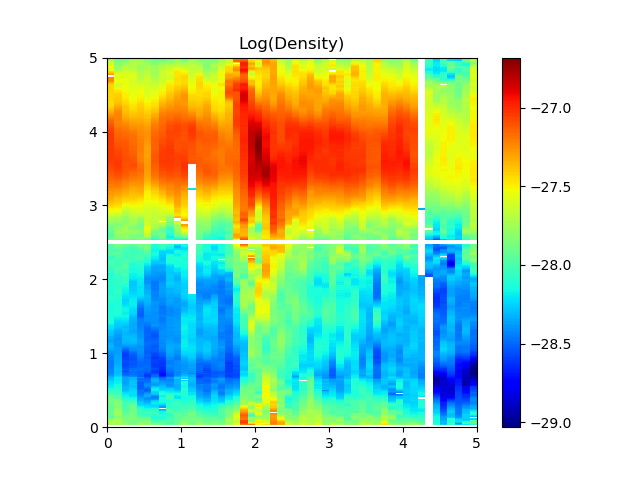

Text(0.5,1,'Log(Density)')

In [20]:
plt.figure()

plt.imshow(np.log(fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
plt.colorbar()
plt.axis(aspect='image')
plt.title('Log(Density)')

In [21]:
start_orbit=50
min_lat = 30
N = 50

fig_index1 = np.hstack([np.arange(-90,-min_lat,0.01),0, np.arange(min_lat,90,0.01)])
fig_index2 = np.hstack([np.arange(90,min_lat,-0.01),0, np.arange(-min_lat,-90,-0.01)])
fig_index = np.hstack([fig_index1,fig_index2])

fig_orbit = np.array(range(N))/2+start_orbit

f_fig_values = np.zeros([len(fig_index),len(fig_orbit)])

for i in range(N):
    data_column1= FAC[abs(pOrbit_nr-(start_orbit+i))<0.01]
    if data_column1.N_heading.mean() > 0:
        data_column2 = FAC[abs(pOrbit_nr-(start_orbit+i+0.5))<0.01]
    else:
        data_column1= FAC[abs(pOrbit_nr-(start_orbit+i+0.5))<0.01]
        data_column2 = FAC[abs(pOrbit_nr-(start_orbit+i+1))<0.01]

    data_column1 = data_column1.set_index('Latitude')
    data_column2 = data_column2.set_index('Latitude')

    data_column1 = data_column1.reindex(labels=fig_index1, method='nearest', tolerance=1).FAC_roll.values
    data_column2 = data_column2.reindex(labels=fig_index2, method='nearest', tolerance=1).FAC_roll.values

    f_fig_values[:,i] = np.hstack([data_column1,data_column2])

<IPython.core.display.Javascript object>


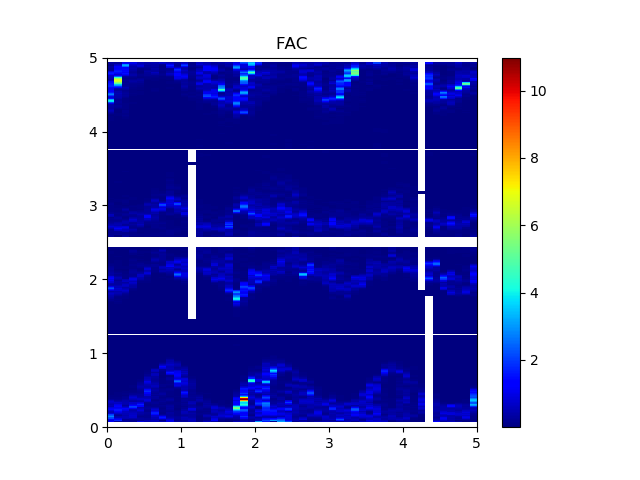

Text(0.5,1,'FAC')

In [22]:
plt.figure()

plt.imshow(abs(f_fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#cmap='seismic')
plt.colorbar()
plt.axis(aspect='image')
plt.title('FAC')

<IPython.core.display.Javascript object>


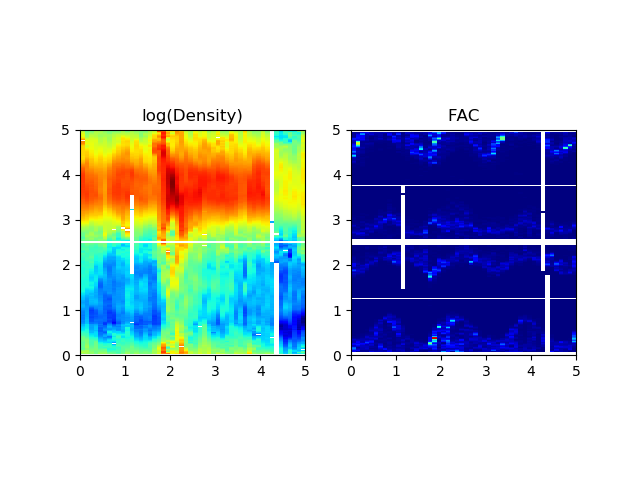

Text(0.5,1,'FAC')

In [23]:
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(np.log(fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('log(Density)')

plt.subplot(1, 2, 2)

plt.imshow(abs(f_fig_values), extent=[0, 5, 0, 5], origin='lower',
           cmap='jet')
#plt.colorbar()
plt.axis(aspect='image')
plt.title('FAC')